# Supervised Learning: Preprocessing and Pipelines
Wed, Jun 6, 2018 Robert Piazza

This mini-project will show different elements in creating a pipeline for pre-processing data.

### Overview:
* Perform exploratory analysis
* Impute or drop missing data
* Convert categorical variables to dummy variables
* Center and scale the data
* Create a test-train split of the data
* Perform cross validation if you have a smaller dataset
* Perform regularization
* Perform a grid search of optimal parameters


We'll be working with the mtcars, PIMA indians diabetes, and voting record datasets for this project
We'll start with the mtcars dataset where we will be attempting to predict miles per gallon (mpg)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.5+ KB

Description:
              mpg       displ          hp       weight       accel        size
count  392.000000  392.000000  392.000000   392.000000  392.000000  392.000000
mean    23.445918  194.411990  104.469388  2977.584184   15.541327   13.679847
std      7.805007  104.644004   38.491160   849.402560    2.758864    4.264458
min      9.000000   68.000000   46.000000  1613.000000    8.000000    7.500000
25%     17.000000  105.000000   75.000000  2225.250000   13.775000   10.000000
50%     22.750000  151.000000   93.500000  2803.500000   15.500000   10.000000
75%     29.000000  275.750000  126.000000

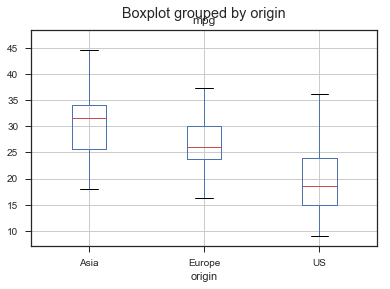

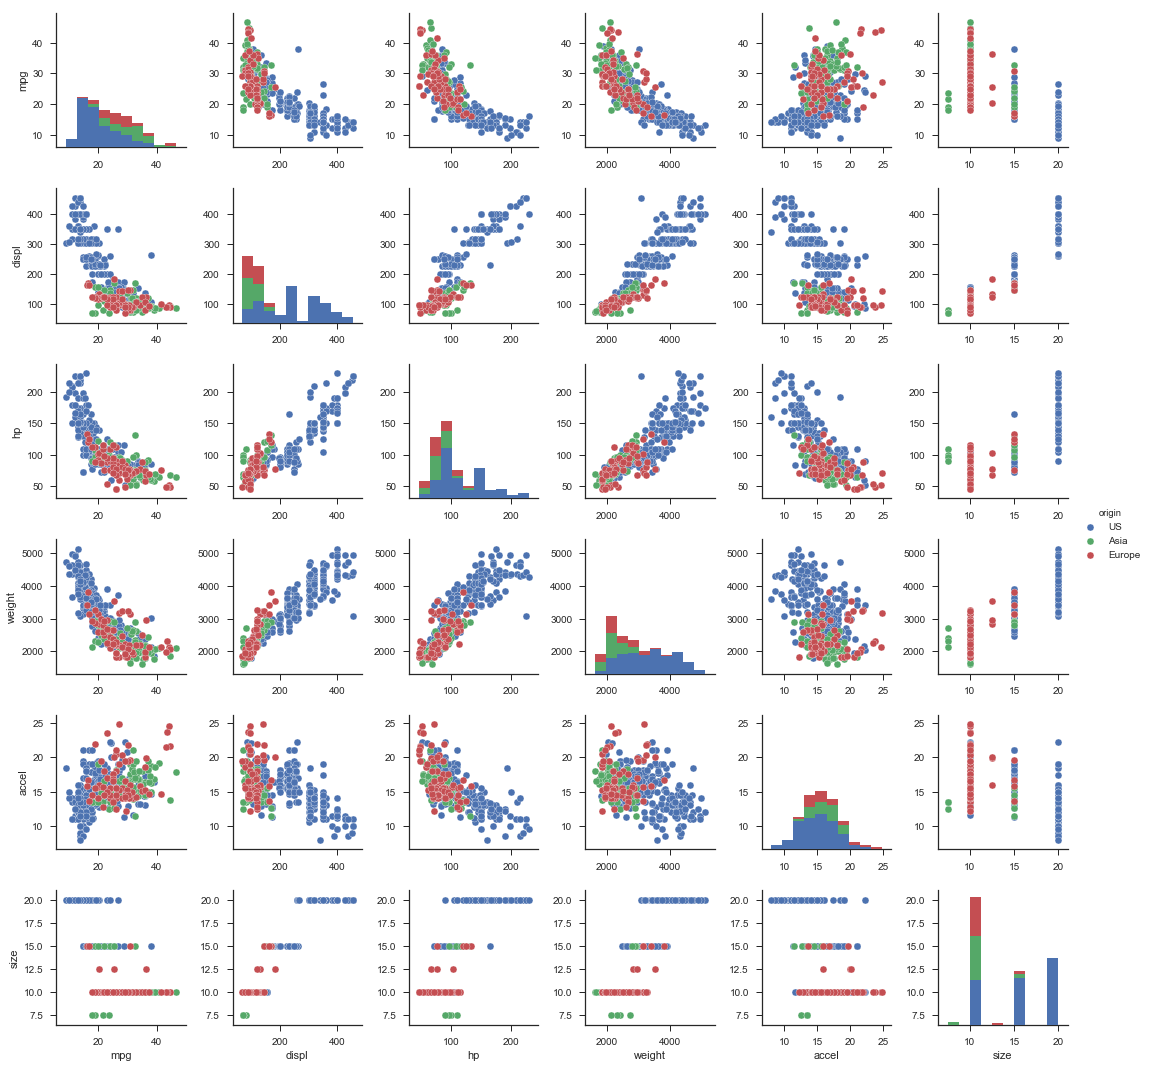

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('./Datasets/auto.csv')
print('Information:')
auto.info()
print('\nDescription:')
print(auto.describe())
print('\nTop 5 lines:')
auto.head()

auto.boxplot('mpg','origin')
plt.show()

sns.set(style="ticks")
sns.pairplot(auto, hue="origin")
plt.show()

These are good checks to view vital information about the data, see metrics about each attribute, and view some of the first observations to get a feel for what we're dealing with. The scatter matrix gives us a quick intuition for how the categories are split and quick relationships we can draw between different variables. 

Next we would want to impute or drop any missing data, mtcars isn't missing any data, but the PIMA indians dataset on diabetes does. 

## Pima Indians- predicting diabetes

In [19]:
diabetes = pd.read_csv('./Datasets/diabetes.csv')
diabetes.info()
diabetes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

There's a lot of zeros there! Let's see how much data we would lose if we eliminated all the rows which are missing information, remember from above, we started with 768 observations. 

In [20]:
#Dropping missing data
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)
diabetes=diabetes.dropna()
diabetes.shape

(393, 9)

Wow! Almost half the data disappeared! Let's do some more intelligent massaging of the data and replace the missing data with the mean from the missing data's column

In [21]:
#Imputing missing data
from sklearn.preprocessing import Imputer
diabetes = pd.read_csv('./Datasets/diabetes.csv')
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)
d_columns = diabetes.columns

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(diabetes)
diabetes = imp.transform(diabetes)
pd.DataFrame(diabetes,columns=d_columns).loc[0:5]

pregnancies  glucose  diastolic   triceps     insulin   bmi    dpf   age  \
0          6.0    148.0       72.0  35.00000  155.548223  33.6  0.627  50.0   
1          1.0     85.0       66.0  29.00000  155.548223  26.6  0.351  31.0   
2          8.0    183.0       64.0  29.15342  155.548223  23.3  0.672  32.0   
3          1.0     89.0       66.0  23.00000   94.000000  28.1  0.167  21.0   
4          0.0    137.0       40.0  35.00000  168.000000  43.1  2.288  33.0   
5          5.0    116.0       74.0  29.15342  155.548223  25.6  0.201  30.0   

   diabetes  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4       1.0  
5       0.0

Much nicer, using this information, we can start running our models on the cleaned data. 

Let's look now at what we do with categorical data and splitting this information for our models. For this, we'll return to our mtcars dataset.

## Creating dummy variables

In [22]:
auto_origin_split = pd.get_dummies(auto) 
#get_dummies will split a categorical variable to multiple binary variables: i.e.:
#0: Observation was not in that category
#1: Observation was in that category
auto_origin_split.head()

mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0

Many times, we'll drop the first category column generated this way because it is redundant information by process of elimination.

In [23]:
auto_origin_split_better = pd.get_dummies(auto,drop_first=True) 

#Print new columns
auto_origin_split_better.columns

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Europe',
       'origin_US'],
      dtype='object')

We'll skip ahead a little with this dataset and do a simple linear regression of this dataset using the new dummy variables and incorporate a training/test split and Ridge regression for regularization.

In [24]:
y=auto_origin_split_better.mpg
X=auto_origin_split_better.drop('mpg',axis = 1)

##Linear regression with dummy variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17760704)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.72795370206976928

Alright! 73% accuracy out of the box with just a linear model!

Let's look at our car data again but incorporate a 5-fold cross validation:

## Cross-validation

In [25]:
import pandas as pd
auto = pd.read_csv('./Datasets/auto.csv')
auto_origin_split_better = pd.get_dummies(auto,drop_first=True) 
y=auto_origin_split_better.loc[:,['mpg']]
X=auto_origin_split_better.drop('mpg',axis = 1)

##Linear regression with dummy variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17760704)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)
ridge_cv = cross_val_score(ridge,X,y,cv=5)
print(ridge_cv)

[ 0.75266962  0.66042411  0.64245192  0.70017383  0.69141599]


The 5-fold cross-validation showed that splitting the dataset into different train/test splits will give different accuracies on each run but the model which is trained on each of those will be the most general. 

## Normalizing
Let's now add in some centering and scaling of our data.
Many models use some form of distance to inform them, either implicitely or explicitely. 
Example: k-NN uses distance explicitly when making predictions
We want features to be on a similar scale so one feature doesn't overpower the rest. 
We do this by normalizing the data. Here, we'll center around zero with a variance of 1.

We'll be using a wine dataset for this demonstration.

In [26]:
##import winedataset
wine = pd.read_csv('./Datasets/white-wine.csv')
y=(wine.quality<6)*1 #Change the quality from a 1-10 scale to a 5 or less scale
X=wine.drop('quality',axis = 1)
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

There's a large difference in the scale of these features, so we'll normalize them. 

In [27]:
#Baseline mean and standard deviation for alcohol in the wine dataset
np.mean(X.alcohol), np.std(X.alcohol)

(10.514267047774638, 1.2304949365418658)

In [28]:
##Scaling in scikit-learn
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X),columns=X.columns)
X_scaled.loc[0:5]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   
3       0.409125         -0.478657    -0.117278        0.415768   0.559727   
4       0.409125         -0.478657    -0.117278        0.415768   0.559727   
5       1.475751          0.017452     0.543838        0.100282   0.193523   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.569932              0.744565  2.331512 -1.246921  -0.349184   
1            -1.253019             -0.149685 -0.009154  0.740029   0.001342   
2            -0.312141             -0.973336  0.358665  0.475102  -0.436816   
3             0.687541              1.121091  0.525855  0.011480  -0.787342   
4             0.687541              1.121091  0.525855  0.011480  -0.787342   
5            -0.312141             -0.973336  0.358665  0.475102  -0.436816   

    alcohol  
0 -1.393152  
1 -0.824276  
2 -0.336667  
3 -0.499203  
4 -0.499203  
5 -0.336667

New values have a mean of 0 and standard deviation of 1

In [29]:
np.mean(X_scaled.alcohol), np.std(X_scaled.alcohol)

(-2.1787843522462087e-15, 1.0000000000000049)

In [30]:
np.mean(y)

0.33483054307880766

In [33]:
##Scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17760704)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)


0.78163265306122454

78% accuracy, but let's compare this model to the non-scaled data:

In [34]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.69387755102040816

So the model rose by 9% just by correctly scaling the data. 

## Bringing it all together I: Pipeline for classification

Here we'll perform a classfication of the wine dataset and use a grid search to fine tune the model parameters. This grid search essentially creates an array of hyperparameters for the model to experiment with and choose the model which has the best score after trying each combination of the hyperparameters. 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
y=np.array(wine.quality<6)
X=np.array(wine.drop('quality',axis = 1))

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space for a grid search
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,np.array(y).ravel(),test_size=0.2,random_state=17760704)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.773469387755102
             precision    recall  f1-score   support

      False       0.79      0.89      0.84       648
       True       0.71      0.55      0.62       332

avg / total       0.77      0.77      0.77       980

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


## Bringing it all together II: Pipeline for regression

Here we'll perform a regression of the gapminder dataset and use a grid search to fine tune the model parameters. We'll remove the region and use the dataset to predict life-expectancy. 

In [45]:
gm = pd.read_csv('./Datasets/gapminder.csv')
y=gm.life
X=gm.drop(['life','Region'],axis = 1)

from sklearn.preprocessing import Imputer
from sklearn.linear_model import ElasticNet

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0.0001,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 17760704)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8349149634233305


So our model works best with an L1 ratio of 1 or complete focused on the L1 regularization instead of L2. (L1 regularization penalizes the sum of the absolute values of the coefficients, L2 penalizes the sum of the squares of the coefficients.)

# Final Thoughts
What weâ€™ve learned
* Data preprocessing including
    * Performed exploratory analysis
    * Imputed or dropped missing data
    * Converted categorical variables to dummy variables
    * Centered and scaled the data
* Created a test-train split of the data
* Performed cross validation
* Performed regularization
* Performed a grid search of optimal parameters
* Pulled multiple steps into a single pipeline